In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#import cufflinks as cf
#cf.go_offline()


In [75]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

from sklearn.feature_selection import SelectFromModel
#from sklearn.preprocessing import StandardScaler, Imputer

from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import roc_auc_score, mean_squared_error

from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
from sklearn.feature_selection import SelectKBest, SelectPercentile
from sklearn.feature_selection import chi2

from sklearn.feature_selection import f_classif, f_regression

from sklearn.metrics import roc_auc_score

from sklearn.linear_model import LinearRegression

from sklearn import preprocessing
from sklearn import utils

from sklearn import metrics

from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

In [76]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.svm import SVR, SVC

import scipy.stats as stats 

from sklearn.preprocessing import FunctionTransformer, PowerTransformer 

from sklearn.metrics import mean_squared_error, r2_score

from sklearn.metrics import roc_auc_score

from sklearn.model_selection import cross_val_score

from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler

from sklearn.preprocessing import RobustScaler

import xgboost as xgb

from sklearn.model_selection import learning_curve

from sklearn.decomposition import PCA

from sklearn.model_selection import GridSearchCV

from sklearn.neural_network import MLPClassifier

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score

from sklearn.metrics import roc_curve

In [77]:
from mlxtend.plotting import plot_learning_curves
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from numpy import arange
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import cross_val_score

In [78]:
#from genetic_selection import GeneticSelectionCV

In [79]:
#from genetic import GeneticSearchCV

In [152]:
data = pd.read_excel('SVM-m.xlsx')
data.head()

,Surface_temperature,Concentration,Grip,Precipitation,Conductivity,Chemical,Snow_height,Base_temperature,Efficiency
0,0.379094,0.015162,0.971859,0.018224,0.500500,0.030556,0.022255,0.153022,1
1,0.379094,0.014596,0.971859,0.018224,0.500500,0.024645,0.022255,0.142163,-1
2,0.382563,0.014596,0.971859,0.018224,0.500500,0.024645,0.022255,0.142163,-1
3,0.389500,0.014879,0.971859,0.018224,0.512116,0.030556,0.022255,0.142163,1
4,0.386031,0.015445,0.971859,0.018224,0.523733,0.030556,0.022255,0.142163,1


In [153]:
data.describe()

,Surface_temperature,Concentration,Grip,Precipitation,Conductivity,Chemical,Snow_height,Base_temperature,Efficiency
count,3843.000000,3843.000000,3843.000000,3843.000000,3843.000000,3843.000000,3843.000000,3843.000000,3843.000000
mean,0.528594,0.072923,0.901342,0.078309,0.226881,0.015094,0.055186,0.496250,0.071038
std,0.160313,0.219047,0.209476,0.126164,0.204163,0.053202,0.113230,0.225463,0.997603
min,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,-1.000000
25%,0.455406,0.001000,0.943718,0.001000,0.001000,0.001000,0.001000,0.337620,-1.000000
50%,0.545594,0.005249,0.985930,0.001000,0.221709,0.006911,0.001000,0.489641,1.000000
75%,0.621906,0.021677,1.000000,0.104345,0.407570,0.012822,0.043511,0.652522,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [154]:
data.shape

(3843, 9)

In [155]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3843 entries, 0 to 3842
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Surface_temperature  3843 non-null   float64
 1   Concentration        3843 non-null   float64
 2   Grip                 3843 non-null   float64
 3   Precipitation        3843 non-null   float64
 4   Conductivity         3843 non-null   float64
 5   Chemical             3843 non-null   float64
 6   Snow_height          3843 non-null   float64
 7   Base_temperature     3843 non-null   float64
 8   Efficiency           3843 non-null   int64  
dtypes: float64(8), int64(1)
memory usage: 270.3 KB


In [156]:
data.isnull().sum()

Surface_temperature    0
Concentration          0
Grip                   0
Precipitation          0
Conductivity           0
Chemical               0
Snow_height            0
Base_temperature       0
Efficiency             0
dtype: int64

In [157]:
col_mask=data.isnull().any(axis=0) 
row_mask=data.isnull().any(axis=1)
data.loc[row_mask,col_mask]

""


In [158]:
data.columns

Index(['Surface_temperature', 'Concentration', 'Grip', 'Precipitation',
       'Conductivity', 'Chemical', 'Snow_height', 'Base_temperature',
       'Efficiency'],
      dtype='object')

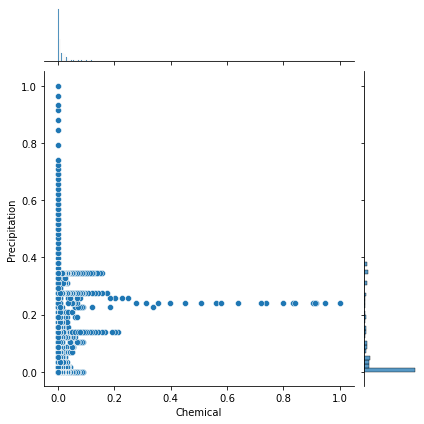

In [160]:
sns.jointplot(x='Chemical',y='Precipitation',data=data)

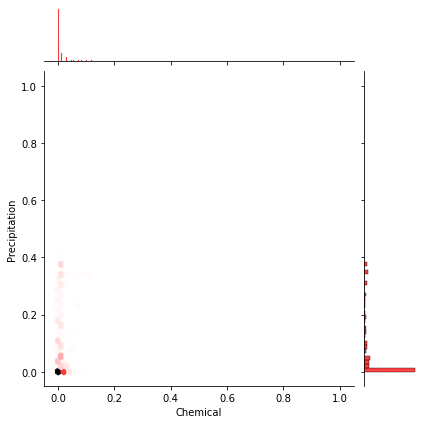

In [206]:
sns.jointplot(x='Chemical',y='Precipitation',data=data,kind='hex',color='red')

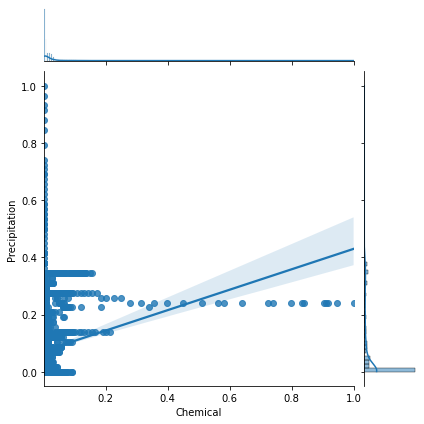

In [162]:
sns.jointplot(x='Chemical',y='Precipitation',data=data,kind='reg')

In [237]:
#sns.jointplot(x='Conductivity',y='Chemical',data=data,kind='kde',color='purple')


In [236]:
#sns.jointplot(x='Base_temperature',y='Chemical',data=data,kind='kde',color='red')

In [235]:
#sns.jointplot(x='Grip',y='Chemical',data=data,kind='kde',color='blue')

In [234]:
#sns.jointplot(x='Concentration',y='Chemical',data=data,kind='kde',color='orange')

In [233]:
#sns.jointplot(x='Surface_temperature',y='Chemical',data=data,kind='kde',color='cyan')

In [232]:
#sns.jointplot(x='Snow_height',y='Chemical',data=data,kind='kde',color='green')

In [231]:
#sns.jointplot(x='Precipitation',y='Chemical',data=data,kind='kde',color='pink')

<AxesSubplot:xlabel='Precipitation'>

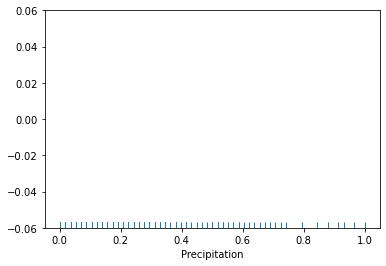

In [168]:
sns.rugplot(data['Precipitation'])

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


<AxesSubplot:xlabel='Precipitation', ylabel='Density'>

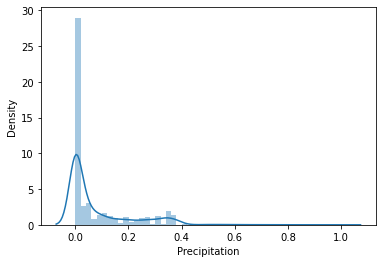

In [169]:
sns.distplot(data['Precipitation'])

(-0.2, 1.1)

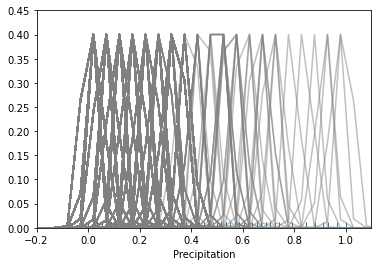

In [190]:
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np

#dataset = np.random.randn(25)
dataset = data['Precipitation']

sns.rugplot(dataset);

x_min = dataset.min() - 2
x_max = dataset.max() + 2

x_axis = np.linspace(x_min,x_max,100)

url = 'https://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth'

bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2

kernel_list = []

for data_point in dataset:
    
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    kernel = kernel/kernel.max()
    kernel = kernel*.4
    plt.plot(x_axis,kernel,color = 'grey', alpha=0.5)
    
plt.ylim(0,0.45)
plt.xlim(-0.2,1.1)
    

([], [])

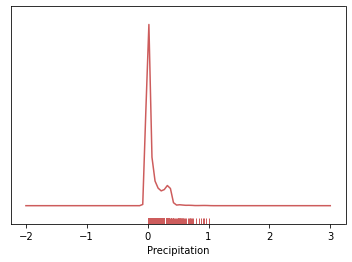

In [191]:
sum_of_kde = np.sum(kernel_list,axis=0)

fig = plt.plot(x_axis,sum_of_kde,color='indianred')

sns.rugplot(dataset, c = 'indianred')

plt.yticks([])


In [131]:
from collections import Counter 
print(Counter(data['Efficiency']))

Counter({1: 2058, -1: 1785})


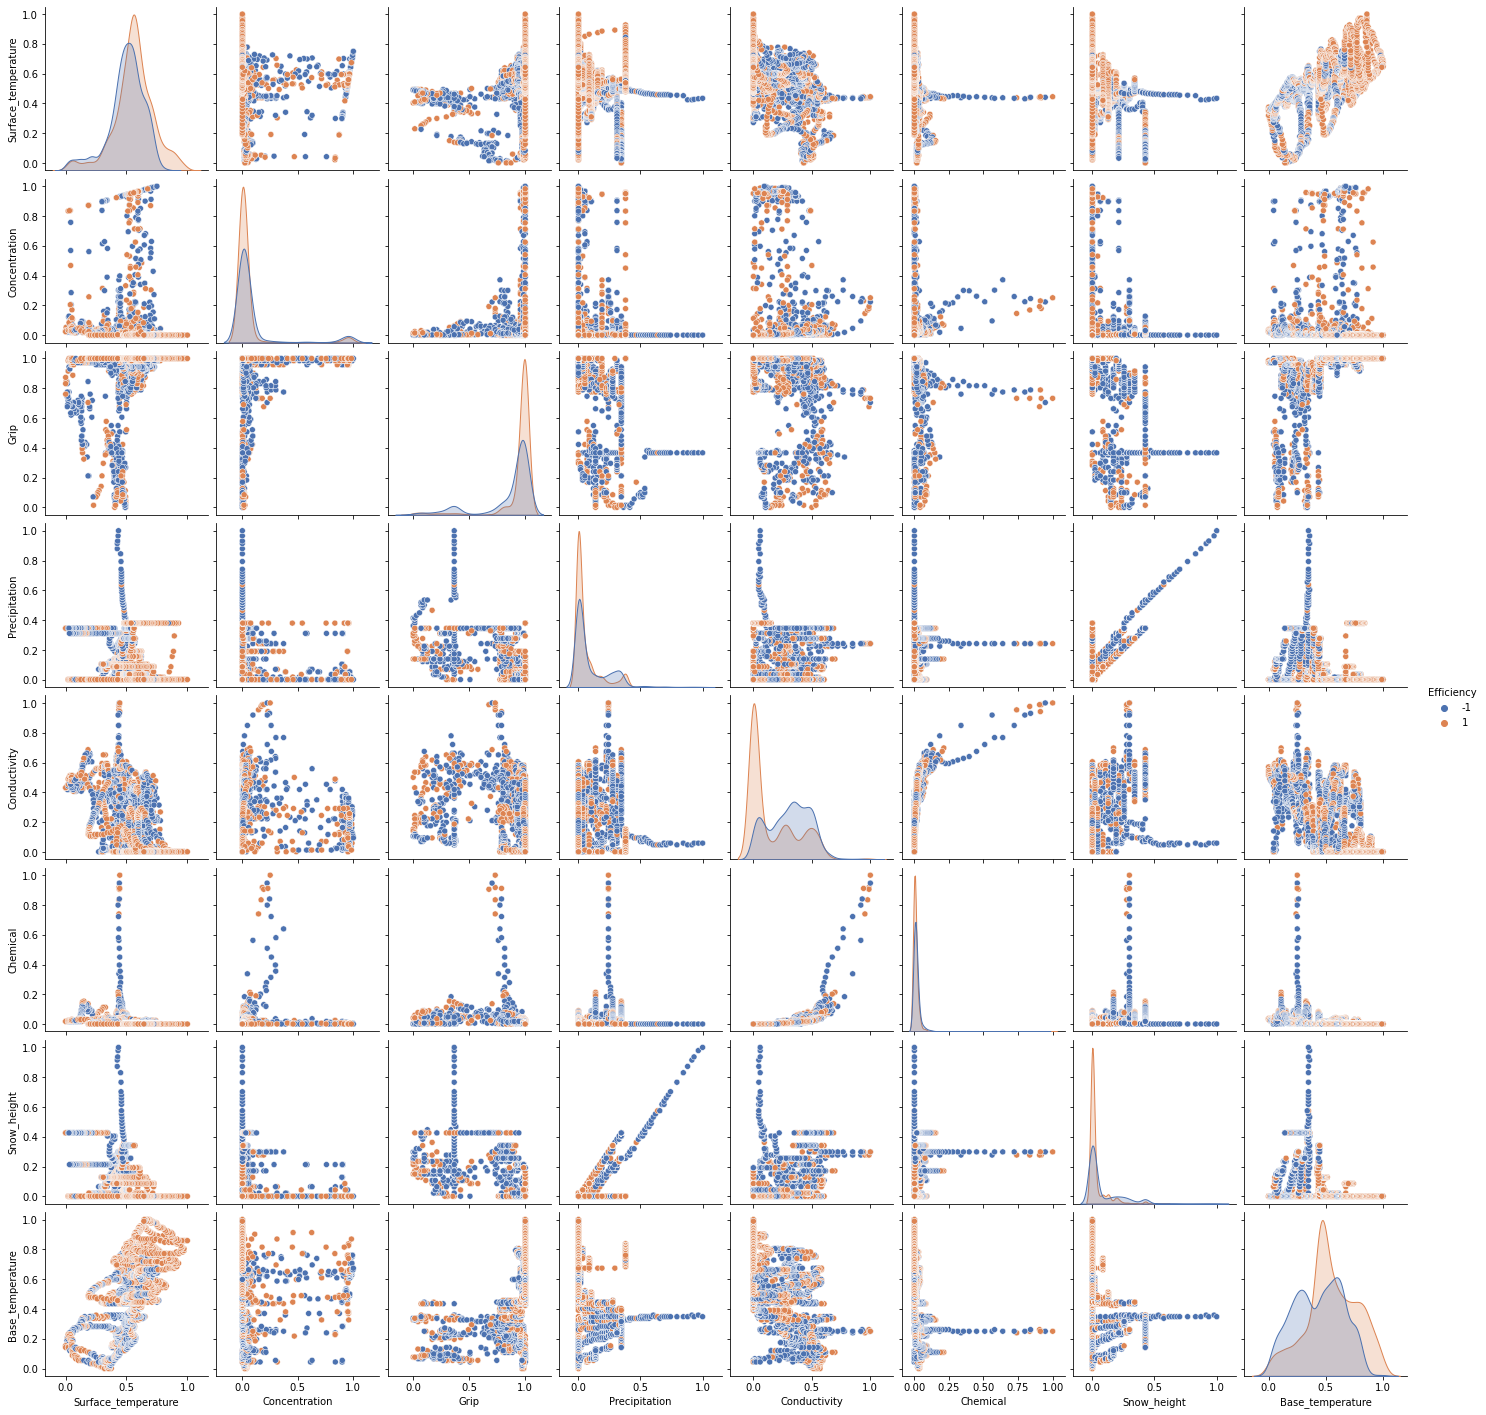

In [132]:
sns.pairplot(data,hue='Efficiency',palette='deep')

In [193]:
#sns.pairplot(data[['Chemical','Efficiency']],hue='Efficiency',palette='dark',height=5,size=5)

The `size` parameter has been renamed to `height`; please update your code.


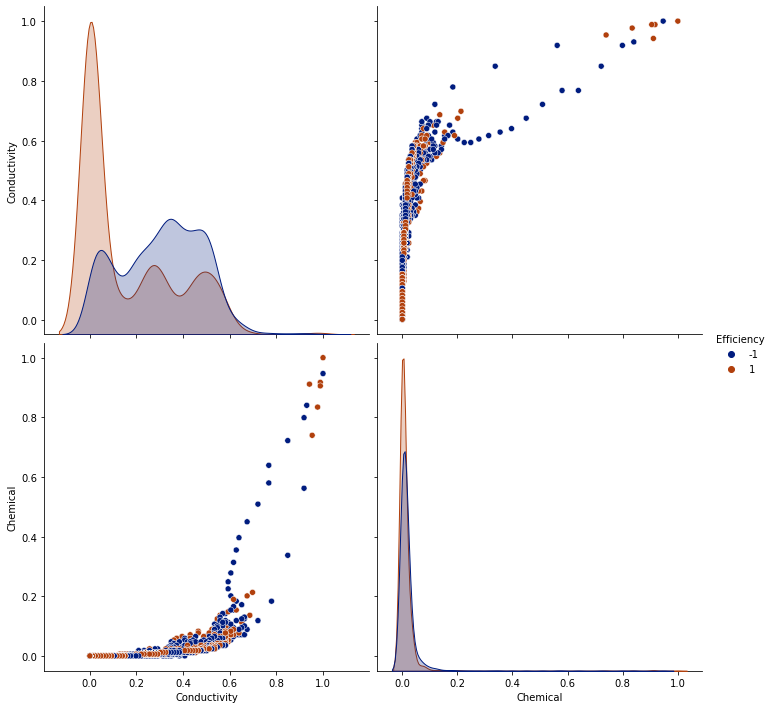

In [167]:
sns.pairplot(data[['Conductivity','Chemical','Efficiency']],hue='Efficiency',palette='dark',height=5,size=5)

The `size` parameter has been renamed to `height`; please update your code.


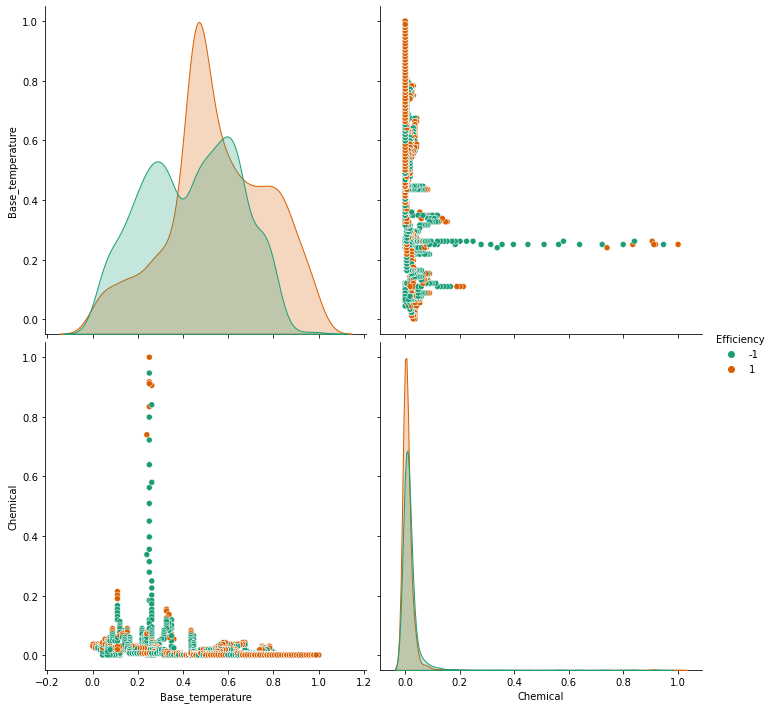

In [239]:
sns.pairplot(data[['Base_temperature','Chemical','Efficiency']],hue='Efficiency',palette='Dark2',height=5,size=5)

The `size` parameter has been renamed to `height`; please update your code.


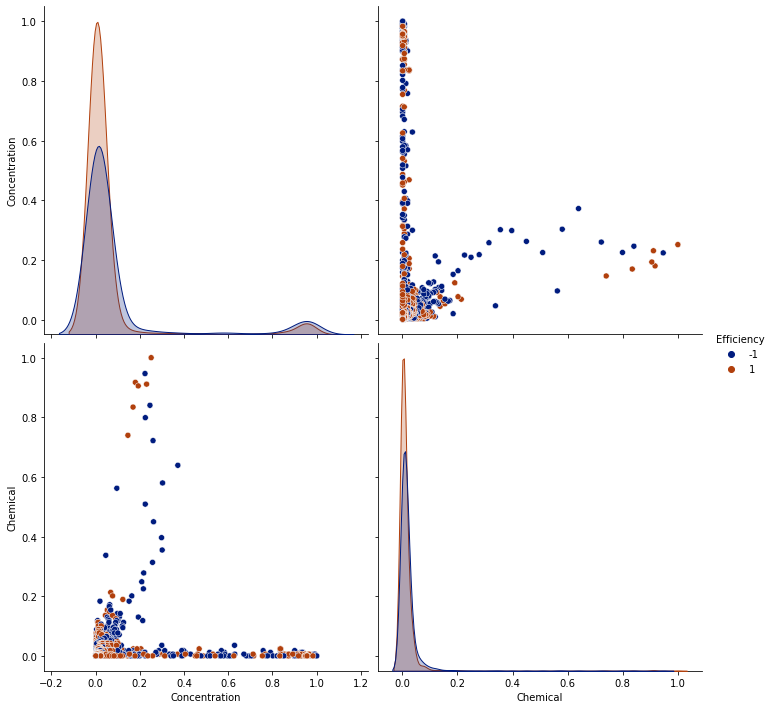

In [142]:
sns.pairplot(data[['Concentration','Chemical','Efficiency']],hue='Efficiency',palette='dark',height=5,size=5)

The `size` parameter has been renamed to `height`; please update your code.


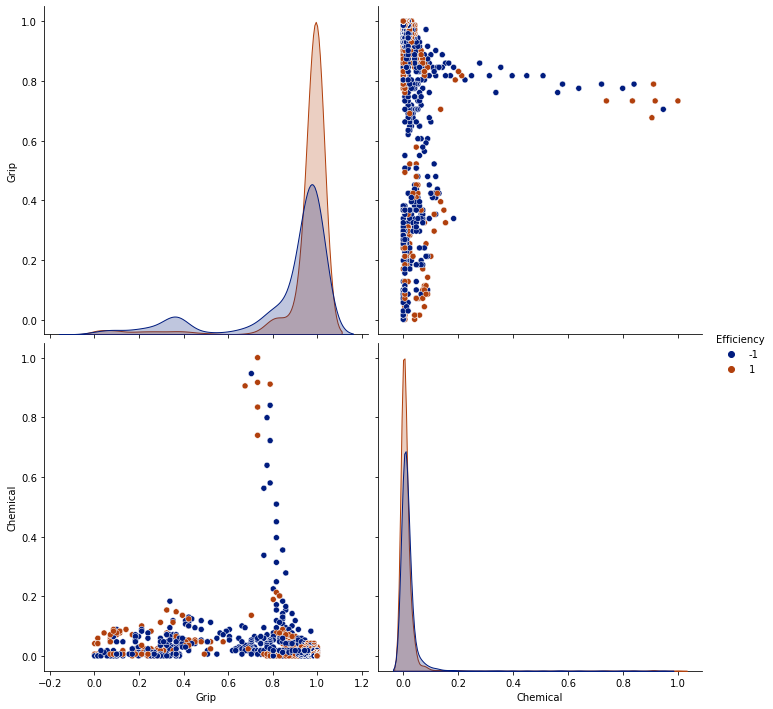

In [144]:
sns.pairplot(data[['Grip','Chemical','Efficiency']],hue='Efficiency',palette='dark',height=5,size=5)

The `size` parameter has been renamed to `height`; please update your code.


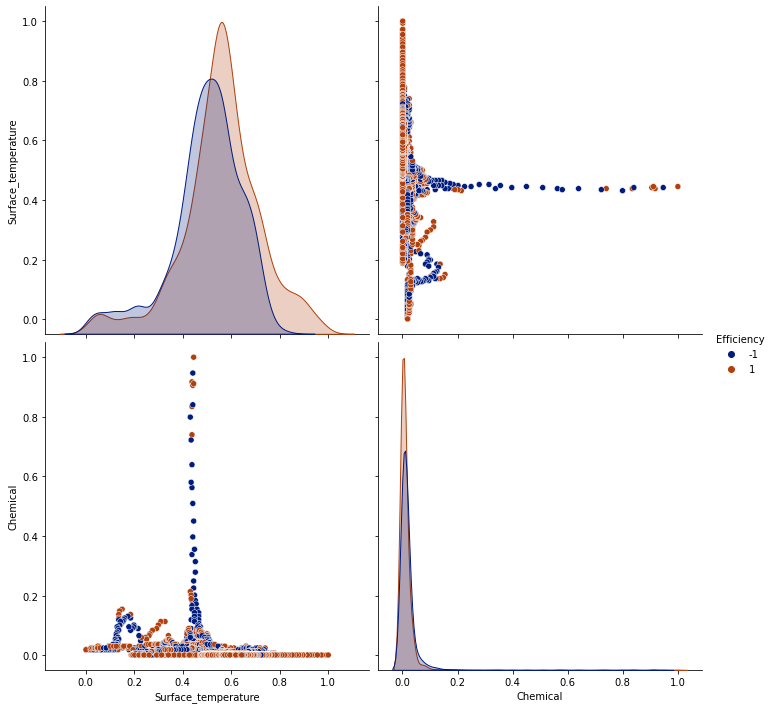

In [146]:
sns.pairplot(data[['Surface_temperature','Chemical','Efficiency']],hue='Efficiency',palette='dark',height=5,size=5)

The `size` parameter has been renamed to `height`; please update your code.


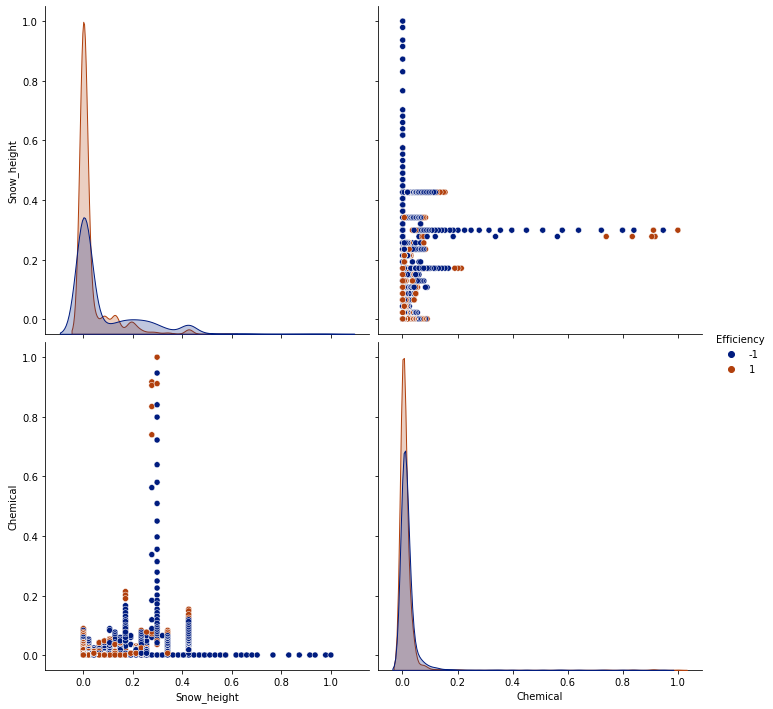

In [147]:
sns.pairplot(data[['Snow_height','Chemical','Efficiency']],hue='Efficiency',palette='dark',height=5,size=5)

The `size` parameter has been renamed to `height`; please update your code.


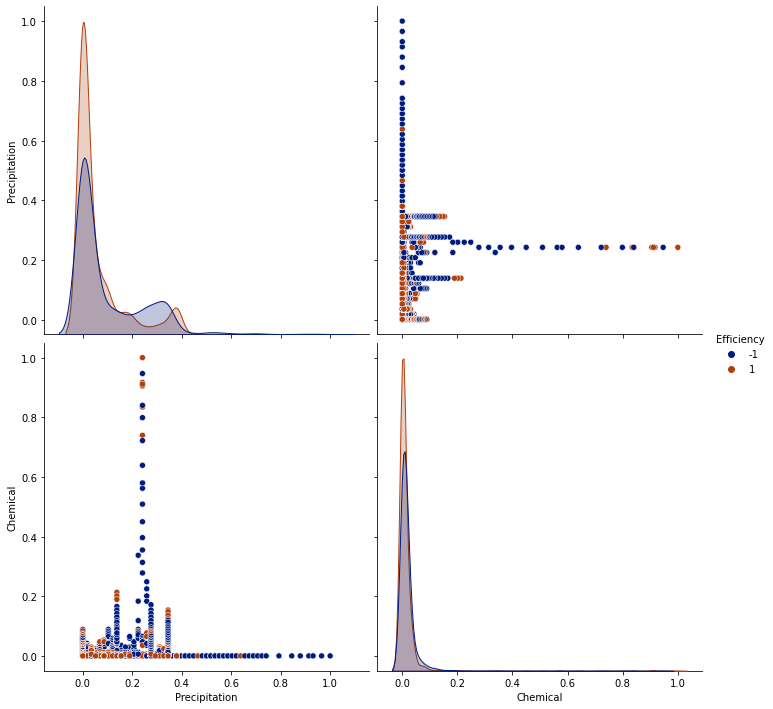

In [149]:
sns.pairplot(data[['Precipitation','Chemical','Efficiency']],hue='Efficiency',palette='dark',height=5,size=5)

In [151]:
#sns.pairplot(data[['Conductivity','Chemical','Efficiency','Base_temperature','Grip']],hue='Efficiency',palette='dark',height=5,size=5)

In [87]:
X_train, X_test, y_train, y_test = train_test_split(data.drop
                                                    (labels='Efficiency',axis=1),
                                                    data['Efficiency'], 
                                                    test_size=0.3, random_state=0)

In [133]:
#sns.pairplot(X_train)

In [47]:
from collections import Counter
#my_list = ["red", "blue", "red", "red", "blue"]
print(Counter(y_train))
print(Counter(y_test))

Counter({1: 1428, -1: 1262})
Counter({1: 630, -1: 523})


<AxesSubplot:>

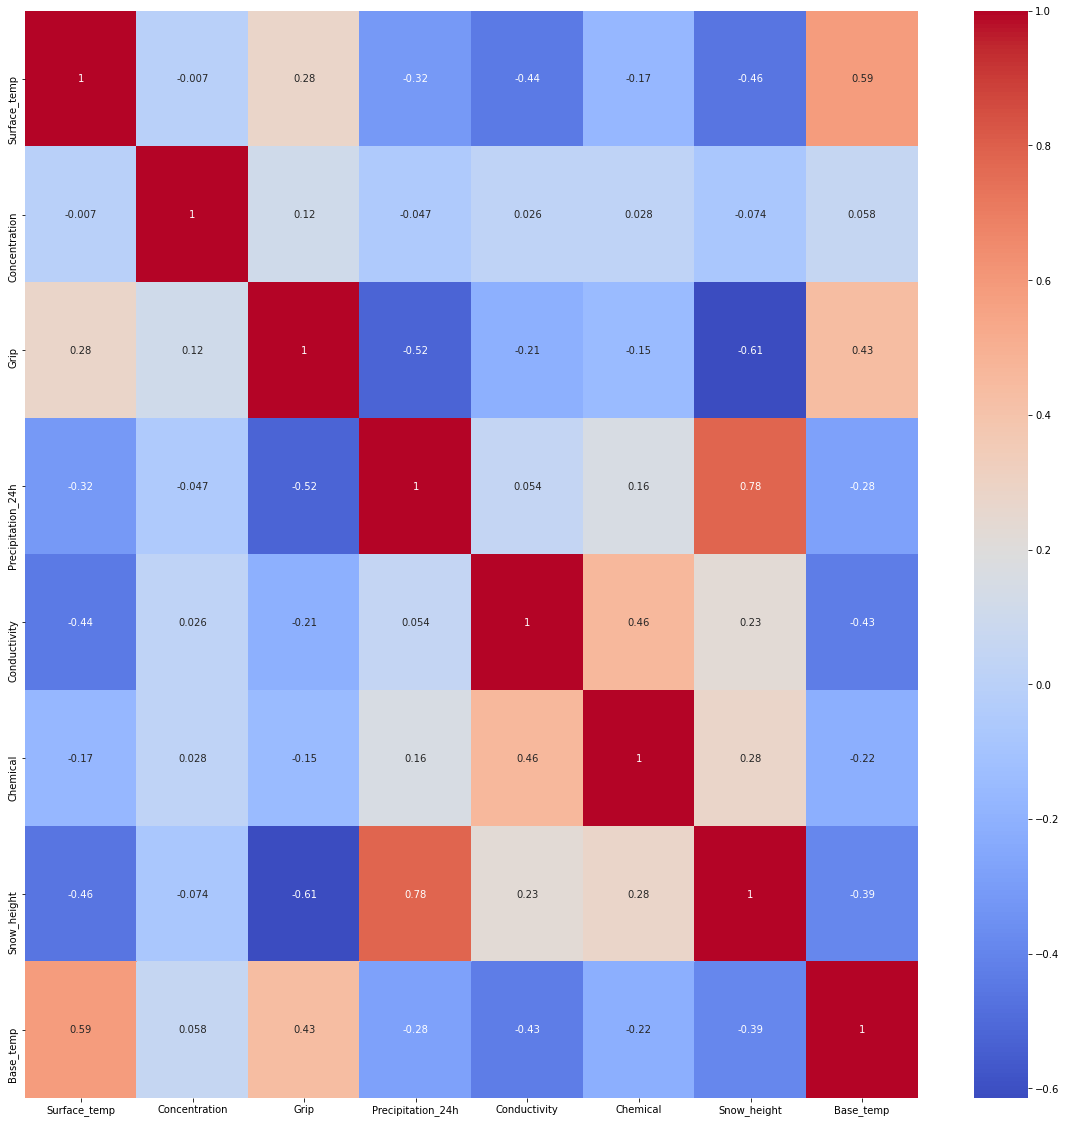

In [88]:
corrmat = X_train.corr()
fig, ax = plt.subplots()
fig.set_size_inches(20,20)
sns.heatmap(corrmat,cmap ="coolwarm", annot=True)

In [844]:
# the first step of this procedure  consists in building
# a machine learning algorithm using all the available features
# and then determine the importance of the features according
# to the algorithm
 
# set the seed for reproducibility
seed_val = 1000000000
np.random.seed(seed_val)
 
# build initial model using all the features
model_all_features = xgb.XGBClassifier(
    nthread=10, max_depth=4, n_estimators=500, learning_rate=0.05)
 
model_all_features.fit(X_train, y_train)
 
# calculate the roc-auc in the test set
y_pred_test = model_all_features.predict_proba(X_test)[:, 1]
auc_score_all = roc_auc_score(y_test, y_pred_test)
print('Test all features xgb ROC AUC=%f' % (auc_score_all))

Test all features xgb ROC AUC=0.937664


Text(0.5, 1.03, 'Importance of variables')

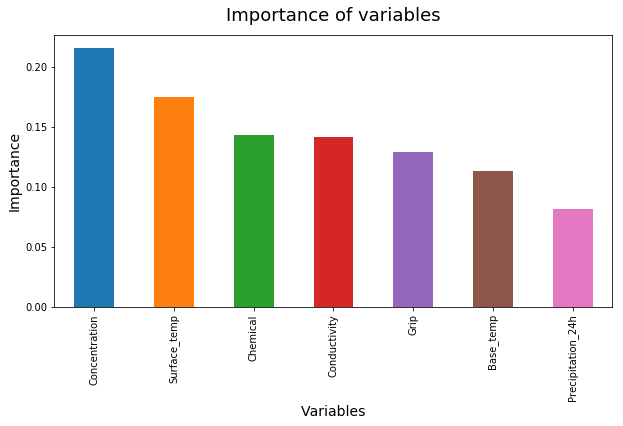

In [1445]:
# the second step consist of deriving the importance of 
# each feature and ranking them from the most to the least
# important
 
# get feature name and importance
features = pd.Series(model_all_features.feature_importances_)
features.index = X_train.columns
 
# sort the features by importance
features.sort_values(ascending=False, inplace=True)
 
# plot
features.plot.bar(figsize=(10,5))
plt.ylabel('Importance', fontsize = 14)
plt.xlabel('Variables', fontsize = 14)
plt.title('Importance of variables', fontsize = 18, y = 1.03)

In [648]:
features = list(features.index)
features

TypeError: 'builtin_function_or_method' object is not iterable

In [167]:
# next, we need to build a machine learning
# algorithm using only the most important feature
 
# set the seed for reproducibility
seed_val = 1000000000
np.random.seed(seed_val)
 
# build initial model using all the features
model_one_feature = xgb.XGBClassifier(
    nthread=10, max_depth=4, n_estimators=500, learning_rate=0.05)
 
# train using only the most important feature
model_one_feature.fit(X_train[features[0]].to_frame(), y_train)
 
# calculate the roc-auc in the test set
y_pred_test = model_one_feature.predict_proba(X_test[features[0]].to_frame())[:, 1]
auc_score_first = roc_auc_score(y_test, y_pred_test)
print('Test one feature xgb ROC AUC=%f' % (auc_score_first))

Test one feature xgb ROC AUC=0.664276


In [168]:
# the final step consists in adding one at a time
# all the features, from the most to the least
# important, and build an xgboost at each round.
 
# once we build the model, we calculate the new roc-auc
# if the new roc-auc is bigger than the original one
# (with one feature), then that feature that was added
# was important, and we should keep it.
# otherwise, we should remove the feature
 
# recursive feature addition:
 
# first we arbitrarily set the increase in roc-auc
# if the increase is above this threshold,
# the feature will be kept
tol = 0.0001
 
print('doing recursive feature addition')
 
# we initialise a list where we will collect the
# features we should keep
features_to_keep = [features[0]]
 
# set a counter to know how far ahead the loop is going
count = 1
 
# now we loop over all the features, in order of importance:
# remember that features is the list of ordered features
# by importance
for feature in features[1:]:
    print()
    print('testing feature: ', feature, ' which is feature ', count,
          ' out of ', len(features))
    count = count + 1
 
    # initialise model
    model_int = xgb.XGBClassifier(
        nthread=10, max_depth=4, n_estimators=500, learning_rate=0.05)
 
    # fit model with the selected features
    # and the feature to be evaluated
    model_int.fit(
        X_train[features_to_keep + [feature] ], y_train)
 
    # make a prediction over the test set
    y_pred_test = model_int.predict_proba(
        X_test[features_to_keep + [feature] ])[:, 1]
 
    # calculate the new roc-auc
    auc_score_int = roc_auc_score(y_test, y_pred_test)
    print('New Test ROC AUC={}'.format((auc_score_int)))
 
    # print the original roc-auc with one feature
    print('All features Test ROC AUC={}'.format((auc_score_first)))
 
    # determine the increase in the roc-auc
    diff_auc = auc_score_int - auc_score_first
 
    # compare the increase in roc-auc with the tolerance
    # we set previously
    if diff_auc >= tol:
        print('Increase in ROC AUC={}'.format(diff_auc))
        print('keep: ', feature)
        print
        # if the increase in the roc is bigger than the threshold
        # we keep the feature and re-adjust the roc-auc to the new value
        # considering the added feature
        auc_score_first = auc_score_int
        
        # and we append the feature to keep to the list
        features_to_keep.append(feature)
    else:
        # we ignore the feature
        print('Increase in ROC AUC={}'.format(diff_auc))
        print('remove: ', feature)
        print

doing recursive feature addition

testing feature:  Surface_temp  which is feature  1  out of  7
New Test ROC AUC=0.806109145092196
All features Test ROC AUC=0.6642764015645372
Increase in ROC AUC=0.14183274352765884
keep:  Surface_temp

testing feature:  Chemical  which is feature  2  out of  7
New Test ROC AUC=0.8653147699757869
All features Test ROC AUC=0.806109145092196
Increase in ROC AUC=0.059205624883590935
keep:  Chemical

testing feature:  Conductivity  which is feature  3  out of  7
New Test ROC AUC=0.8651285155522445
All features Test ROC AUC=0.8653147699757869
Increase in ROC AUC=-0.00018625442354247568
remove:  Conductivity

testing feature:  Grip  which is feature  4  out of  7
New Test ROC AUC=0.8652914881728441
All features Test ROC AUC=0.8653147699757869
Increase in ROC AUC=-2.328180294286497e-05
remove:  Grip

testing feature:  Base_temp  which is feature  5  out of  7
New Test ROC AUC=0.888945799962749
All features Test ROC AUC=0.8653147699757869
Increase in ROC AUC=

In [169]:
# capture the 8 selected features
seed_val = 1000000000
np.random.seed(seed_val)
 
# build initial model
final_xgb = xgb.XGBClassifier(
    nthread=10, max_depth=4, n_estimators=500, learning_rate=0.05)
 
# fit the model with the selected features
final_xgb.fit(X_train[features_to_keep], y_train)
 
# make predictions
y_pred_test = final_xgb.predict_proba(X_test[features_to_keep])[:, 1]
 
# calculate roc-auc
auc_score_final = roc_auc_score(y_test, y_pred_test)
print('Test selected features ROC AUC=%f' % (auc_score_final))

Test selected features ROC AUC=0.902426


In [46]:
#X_train = X_train.drop(['Grip'], axis=1)

In [47]:
#X_test = X_test.drop(['Grip'], axis=1)

In [48]:
#X_train = X_train.drop(['Conductivity'], axis=1)

In [49]:
#X_test = X_test.drop(['Conductivity'], axis=1)

In [667]:
X_train.columns

Index(['Surface_temp', 'Concentration', 'Grip', 'Precipitation_24h',
       'Conductivity', 'Chemical', 'Snow_height', 'Base_temp'],
      dtype='object')

In [152]:
#X_train = X_train.drop(['Conductivity'], axis=1)

In [64]:
#X_test = X_test.drop(['Conductivity'], axis=1)

In [65]:
#def plot_roc_curve(fpr, tpr):
    #plt.plot(fpr, tpr, color='orange', label='ROC')
    #plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    #plt.xlabel('False Positive Rate')
    #plt.ylabel('True Positive Rate')
    #plt.title('Receiver Operating Characteristic (ROC) Curve')
    #plt.legend()
    #plt.show()

In [ ]:
#cv = StratifiedKFold(n_splits=5,random_state=11,shuffle=True) # Creating a StratifiedKFold object with 5 folds
#cv_scores = cross_val_score(lr,X,y,scoring="accuracy",cv=cv) # Storing the CV scores (accuracy) of each fold

In [668]:
KNN = KNeighborsClassifier()

In [669]:
KNN.fit(X_train,y_train)

KNeighborsClassifier()

In [670]:
KNN_pred_train = KNN.predict(X_train)
KNN_pred_test = KNN.predict(X_test)

In [671]:
KNN.score(X_test,y_test)
KNN.score(X_train,y_train)

0.8944237918215613

In [672]:
scores_KNN = cross_val_score(KNN, X_train, y_train, cv=5)

In [673]:
scores_KNN

array([0.82342007, 0.8605948 , 0.84200743, 0.81040892, 0.85130112])

In [674]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores_KNN.mean(), scores_KNN.std()))

0.84 accuracy with a standard deviation of 0.02


In [675]:
#print('Train set')
#print('KNN roc-auc: {}'.format(roc_auc_score(y_train, KNN_pred_train)))
#print('Test set')
#print('KNN roc-auc: {}'.format(roc_auc_score(y_test, KNN_pred_test)))

In [676]:
print(confusion_matrix(y_test,KNN_pred_test))
print(classification_report(y_test,KNN_pred_test))
classification_report

[[447  76]
 [ 93 537]]
              precision    recall  f1-score   support

          -1       0.83      0.85      0.84       523
           1       0.88      0.85      0.86       630

    accuracy                           0.85      1153
   macro avg       0.85      0.85      0.85      1153
weighted avg       0.85      0.85      0.85      1153



In [677]:
print("Accuracy Score %.2f" % accuracy_score(y_train, KNN_pred_train))

Accuracy Score 0.89


In [678]:
print("Accuracy Score %.2f" % accuracy_score(y_test, KNN_pred_test))

Accuracy Score 0.85


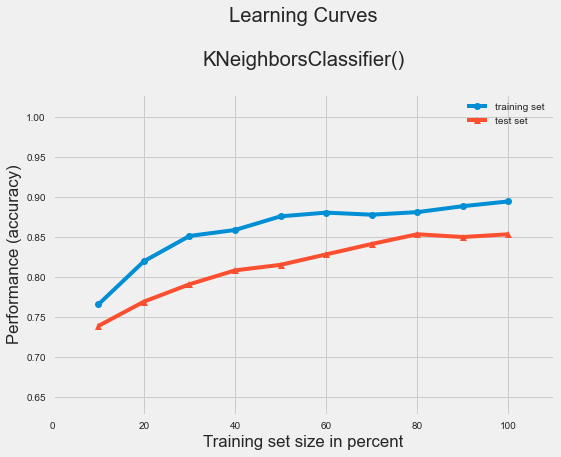

In [865]:
plot_learning_curves(X_train, y_train, X_test, y_test, KNN, scoring='accuracy')
#plt.ylim(-.1,1.1)
#plt.xlim(65,100)
plt.show()

In [830]:
#print("recall_score %.2f" % recall_score(y_test, KNN_pred_test))

In [831]:
#print("precision_score %.2f" % precision_score(y_test, KNN_pred_test))

In [832]:
 #precision_recall_fscore_support(y_test, KNN_pred_test)

In [779]:
#plot_learning_curves(X_train, y_train, X_test, y_test, KNN, scoring='recall')
#plt.ylim(-.1,1.1)
#plt.show()

In [780]:
#plot_learning_curves(X_train, y_train, X_test, y_test, KNN, scoring='roc_auc')
#plt.ylim(-.1,1.1)
#plt.show()

In [508]:
#KNN_pred_test = probs[:, 1]

In [509]:
#auc = roc_auc_score(y_test, KNN_pred_test )
#print('AUC: %.2f' % auc)

In [510]:
#fpr, tpr, thresholds = roc_curve(y_test, KNN_pred_test)
#plot_roc_curve(fpr, tpr)

In [511]:
#train_sizes = [1, 100, 200 ,300, 400, 559]

In [512]:
#train_sizes, train_scores, validation_scores = learning_curve(
#estimator = KNeighborsClassifier(n_neighbors=1),
#X = X_train,
#y = y_train, train_sizes = train_sizes, cv = 5,
#scoring = 'neg_mean_squared_error')

In [513]:
#print('Training scores:\n\n', train_scores)
#print('\n', '-' * 70) # separator to make the output easy to read
#print('\nValidation scores:\n\n', validation_scores)

In [514]:
#train_scores_mean_lm = -train_scores.mean(axis = 1)
#validation_scores_mean_lm = -validation_scores.mean(axis = 1)
#print('Mean training scores\n\n', pd.Series(train_scores_mean_lm, index = train_sizes))
#print('\n', '-' * 20) # separator
#print('\nMean validation scores\n\n',pd.Series(validation_scores_mean_lm, index = train_sizes))

In [515]:
#plt.style.use('seaborn')
#plt.plot(train_sizes, train_scores_mean_lm, label = 'Training error')
#plt.plot(train_sizes, validation_scores_mean_lm, label = 'Validation error')
#plt.ylabel('Score', fontsize = 14)
#plt.xlabel('Training set size', fontsize = 14)
#plt.title('Learning curves for a KNN model', fontsize = 18, y = 1.03)
#plt.legend()
#plt.ylim(0,5)

In [976]:
#from genetic_selection import GeneticSelectionCV
#from sklearn.model_selection import StratifiedKFold, GridSearchCV, RandomizedSearchCV

In [965]:
#paramgrid = {"kernel": ["rbf"],
            # "C"     : np.logspace(-9, 9, num=25, base=10),
            # "gamma" : np.logspace(-9, 9, num=25, base=10)}

In [966]:
#random.seed(1)

In [967]:
#print("Size: ", len(paramgrid["kernel"]) * len(paramgrid["C"]) * len(paramgrid["gamma"]))

In [971]:
#cv = GeneticSearchCV(estimator=SVC(),
                     #params=paramgrid,
                     #scoring="accuracy",
                     #cv=StratifiedKFold(n_splits=2),
                     #verbose=True,
                     #population_size=50,
                     #gene_mutation_prob=0.10,
                     #tournament_size=3,
                     #generations_number=10)

In [972]:
#cv.fit(X_train, y_train)

In [ ]:
#print(cv.best_score_, cv.best_params_)

In [ ]:
#print(pd.DataFrame(cv.cv_results_).sort_values("mean_test_score", ascending=False).head())

In [973]:
#SVM_GA_pred_test = cv.predict(X_test)

In [974]:
#print(confusion_matrix(y_test,SVM_GA_pred_test))
#print(classification_report(y_test,SVM_GA_pred_test))

In [975]:
#print("Accuracy Score %.3f" % accuracy_score(y_test, SVM_GA_pred_test))

In [563]:
#error_rate = []

#for i in range (1,40):
    
    KNN =KNeighborsClassifier(n_neighbors=i)
    KNN.fit(X_train,y_train)
    pred_i = KNN.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

In [728]:
#plt.figure(figsize=(10,6))
#plt.plot(range(1,40),error_rate,color='blue',linestyle='dashed',
       # marker='o', markerfacecolor='red',markersize='10')

#plt.title('Error Rate vs K Value')
#plt.xlabel('K')
#plt.ylabel('Error rate')

In [565]:
#accuracy_score(y_test, pred_KNN_test)

In [729]:
#KNN = KNeighborsClassifier(n_neighbors=4)
#KNN.fit(X_train,y_train)
#pred_KNN_test = KNN.predict(X_test)
#pred_KNN_train = KNN.predict(X_train)

#print(confusion_matrix(y_test,pred_KNN_test))
#print(classification_report(y_test,pred_KNN_test))

In [730]:
#print("Accuracy Score %.3f" % accuracy_score(y_test, pred_KNN_test))

In [732]:
#plot_learning_curves(X_train, y_train, X_test, y_test, KNN)
#plt.show()

In [24]:
#leaf_size = list(range(1,50))
#n_neighbors = list(range(1,5))
#p=[1,2]

In [25]:
#hyperparameters = dict(leaf_size=leaf_size, p=p)
#n_neighbors=n_neighbors,

In [26]:
#clf = GridSearchCV(KNN, hyperparameters, cv=10)
#best_model = clf.fit(X_train,y_train)

In [160]:
#print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
#print('Best p:', best_model.best_estimator_.get_params()['p'])
#print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

In [161]:
#y_pred = best_model.predict(X_test)

In [162]:
#print(confusion_matrix(y_test,y_pred))
#print(classification_report(y_test,y_pred))

In [163]:
#print("Accuracy Score %.3f" % accuracy_score(y_test, y_pred))

In [164]:
#plot_learning_curves(X_train, y_train, X_test, y_test, clf)
#plt.show()

In [462]:
#print('Train set')
#print('KNN optimized roc-auc: {}'.format(roc_auc_score(y_train, pred_KNN_train )))
#print('Test set')
#print('KNN optimized roc-auc: {}'.format(roc_auc_score(y_test, pred_KNN_test )))

In [463]:
#auc = roc_auc_score(y_test, pred_KNN_test )
#print('AUC: %.2f' % auc)

In [464]:
#fpr, tpr, thresholds = roc_curve(y_test, pred_KNN_test)
#plot_roc_curve(fpr, tpr)

In [680]:
XGBoost=xgb.XGBClassifier()
#seed==10, max_depth=8, n_estimators=3500, learning_rate=0.05

In [681]:
XGBoost.fit(X_train,y_train)

XGBClassifier()

In [682]:
XGBoost_pred_train = XGBoost.predict(X_train)
XGBoost_pred_test = XGBoost.predict(X_test)

In [683]:
print(confusion_matrix(y_test,XGBoost_pred_test))
print(classification_report(y_test,XGBoost_pred_test))

[[461  62]
 [101 529]]
              precision    recall  f1-score   support

          -1       0.82      0.88      0.85       523
           1       0.90      0.84      0.87       630

    accuracy                           0.86      1153
   macro avg       0.86      0.86      0.86      1153
weighted avg       0.86      0.86      0.86      1153



In [684]:
print("Accuracy Score %.2f" % accuracy_score(y_train, XGBoost_pred_train))

Accuracy Score 0.87


In [685]:
print("Accuracy Score %.2f" % accuracy_score(y_test, XGBoost_pred_test))

Accuracy Score 0.86


In [686]:
#accuracy_score(y_test, XGBoost_pred_test)

In [428]:
#print('Train set')
#print('XGBoost roc-auc: {}'.format(roc_auc_score(y_train, XGBoost_pred_train)))
#print('Test set')
#print('XGBoost roc-auc: {}'.format(roc_auc_score(y_test, XGBoost_pred_test)))

In [429]:
# Fit / train the model
#prcptrn = Perceptron(eta0=0.1, random_state=1)
#prcptrn.fit(X_train_std, Y_train)

In [430]:
# Check the accuracy of the model
#Y_predict_std = prcptrn.predict(X_test_std)


In [687]:
scores_XGB = cross_val_score(XGBoost, X_train, y_train, cv=5)
scores_XGB

array([0.82899628, 0.84944238, 0.82342007, 0.81784387, 0.83271375])

In [688]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores_XGB.mean(), scores_XGB.std()))

0.83 accuracy with a standard deviation of 0.01


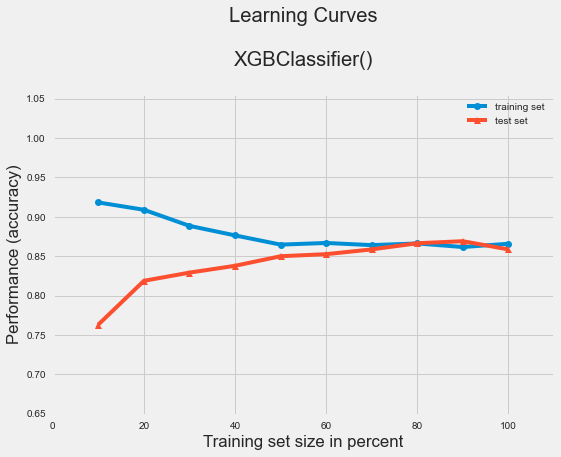

In [689]:
plot_learning_curves(X_train, y_train, X_test, y_test, XGBoost,scoring='accuracy')
#plt.ylim(-.1,1.1)
plt.show()

In [834]:
#print("recall_score %.2f" % recall_score(y_test, XGBoost_pred_test))

In [833]:
#print("precision_score %.2f" % precision_score(y_test, XGBoost_pred_test))

In [784]:
#plot_learning_curves(X_train, y_train, X_test, y_test, XGBoost,scoring='recall')
#plt.ylim(-.1,1.1)
#plt.show()

In [785]:
#plot_learning_curves(X_train, y_train, X_test, y_test, XGBoost,scoring='roc_auc')
#plt.ylim(-.1,1.1)
#plt.show()

In [199]:
#xgb_model = xgb.XGBClassifier()

In [200]:
#optimization_dict = {'max_depth': [2,4,6,8],
                     #'n_estimators': [50,100,200]}

In [342]:
#model = GridSearchCV(xgb_model, optimization_dict, 
                     #scoring='accuracy', verbose=1)

In [343]:
#model.fit(X_train,y_train)

In [344]:
#print(model.best_score_)
#print(model.best_params_)

In [345]:
#print("Accuracy Score %.3f" % accuracy_score(y_test, XGB_pred_test))

In [346]:
#plot_learning_curves(X_train, y_train, X_test, y_test, model)
#plt.show()

In [787]:
dt = DecisionTreeClassifier()

In [691]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [692]:
dt_pred_train = dt.predict(X_train)
dt_pred_test = dt.predict(X_test)

In [693]:
#dt.score(X_test,y_test)
#dt.score(X_train,y_train)

In [694]:
#print('Train set')
#print('Decision Tree roc-auc: {}'.format(roc_auc_score(y_train, dt_pred_train)))
#print('Test set')
#print('Decision Tree roc-auc: {}'.format(roc_auc_score(y_test, dt_pred_test)))

In [695]:
print(confusion_matrix(y_test,dt_pred_test))
print(classification_report(y_test,dt_pred_test))

[[432  91]
 [ 78 552]]
              precision    recall  f1-score   support

          -1       0.85      0.83      0.84       523
           1       0.86      0.88      0.87       630

    accuracy                           0.85      1153
   macro avg       0.85      0.85      0.85      1153
weighted avg       0.85      0.85      0.85      1153



In [696]:
print("Accuracy Score %.2f" % accuracy_score(y_train, dt_pred_train))

Accuracy Score 1.00


In [697]:
print("Accuracy Score %.2f" % accuracy_score(y_test, dt_pred_test))

Accuracy Score 0.85


In [698]:
scores_dt = cross_val_score(dt, X_train, y_train, cv=5)
scores_dt

array([0.81784387, 0.83271375, 0.81226766, 0.83643123, 0.83643123])

In [699]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores_dt.mean(), scores_dt.std()))

0.83 accuracy with a standard deviation of 0.01


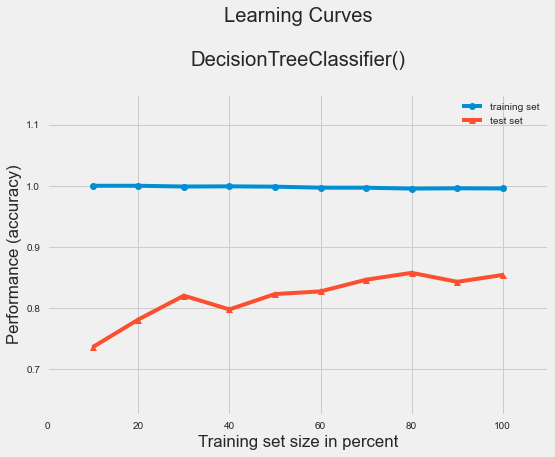

In [700]:
plot_learning_curves(X_train, y_train, X_test, y_test, dt, scoring='accuracy')
#plt.ylim(-.1,1.1)
plt.show()

In [836]:
#print("recall_score %.2f" % recall_score(y_test, dt_pred_test))

In [835]:
#print("precision_score %.2f" % precision_score(y_test, dt_pred_test))

In [788]:
#plot_learning_curves(X_train, y_train, X_test, y_test, dt, scoring='recall')
#plt.ylim(-.1,1.1)
#plt.show()

In [789]:
#plot_learning_curves(X_train, y_train, X_test, y_test, dt, scoring='roc_auc')
#plt.ylim(-.1,1.1)
#plt.show()

In [480]:
#accuracy_score(y_test, dt_pred_test)

In [481]:
#auc = roc_auc_score(y_test, dt_pred_test)
#print('AUC: %.2f' % auc)

In [482]:
#fpr, tpr, thresholds = roc_curve(y_test, dt_pred_test)
#plot_roc_curve(fpr, tpr)

In [483]:
#train_sizes, train_scores, validation_scores = learning_curve(
#estimator = DecisionTreeClassifier(),
#X = X_train,
#y = y_train, train_sizes = train_sizes, cv = 5,
#scoring = 'neg_mean_squared_error')

In [484]:
#print('Training scores:\n\n', train_scores)
#print('\n', '-' * 70) # separator to make the output easy to read
#print('\nValidation scores:\n\n', validation_scores)

In [485]:
#train_scores_mean_lm = -train_scores.mean(axis = 1)
#validation_scores_mean_lm = -validation_scores.mean(axis = 1)
#print('Mean training scores\n\n', pd.Series(train_scores_mean_lm, index = train_sizes))
#print('\n', '-' * 20) # separator
#print('\nMean validation scores\n\n',pd.Series(validation_scores_mean_lm, index = train_sizes))

In [486]:
#plt.style.use('seaborn')
#plt.plot(train_sizes, train_scores_mean_lm, label = 'Training error')
#plt.plot(train_sizes, validation_scores_mean_lm, label = 'Validation error')
#plt.ylabel('Score', fontsize = 14)
#plt.xlabel('Training set size', fontsize = 14)
#plt.title('Learning curves for a Decision Tree model', fontsize = 18, y = 1.03)
#plt.legend()
#plt.ylim(0,2)

In [487]:
#hidden_layer_sizes=(7,2), max_iter=110, alpha=1e-4, solver='sgd', random_state=1,
                  #verbose=True, learning_rate_init=0.1

In [701]:
NN = MLPClassifier()
#solver='lbfgs',hidden_layer_sizes=(1000,)

In [702]:
NN.fit(X_train,y_train)

C:\Users\mha531\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier()

In [703]:
NN_pred_train = NN.predict(X_train)
NN_pred_test = NN.predict(X_test)

In [571]:
#NN.score(X_test,y_test)
#NN.score(X_train,y_train)

In [572]:
#print('Train set')
#print('Neural Network roc-auc: {}'.format(roc_auc_score(y_train, NN_pred_train)))
#print('Test set')
#print('Neural Network a roc-auc: {}'.format(roc_auc_score(y_test, NN_pred_test)))

In [704]:
print(confusion_matrix(y_test,NN_pred_test))
print(classification_report(y_test,NN_pred_test))

[[436  87]
 [169 461]]
              precision    recall  f1-score   support

          -1       0.72      0.83      0.77       523
           1       0.84      0.73      0.78       630

    accuracy                           0.78      1153
   macro avg       0.78      0.78      0.78      1153
weighted avg       0.79      0.78      0.78      1153



In [705]:
print("Accuracy Score %.2f" % accuracy_score(y_train, NN_pred_train))

Accuracy Score 0.77


In [706]:
print("Accuracy Score %.2f" % accuracy_score(y_test, NN_pred_test))

Accuracy Score 0.78


In [707]:
scores_NN = cross_val_score(NN, X_train, y_train, cv=5)
scores_NN

C:\Users\mha531\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\mha531\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\mha531\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\mha531\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer:

array([0.74163569, 0.7527881 , 0.76394052, 0.78624535, 0.7472119 ])

In [708]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores_NN.mean(), scores_NN.std()))

0.76 accuracy with a standard deviation of 0.02


C:\Users\mha531\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\mha531\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\mha531\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\mha531\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer:

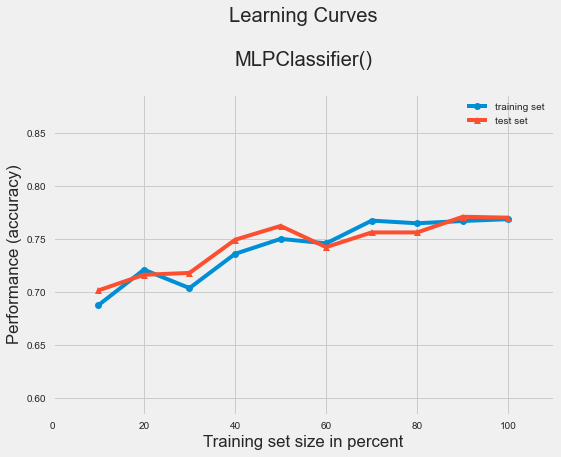

In [709]:
plot_learning_curves(X_train, y_train, X_test, y_test, NN, scoring='accuracy')
#plt.ylim(-.1,1.1)
plt.show()

In [791]:
#plot_learning_curves(X_train, y_train, X_test, y_test, NN, scoring='recall')
#plt.ylim(-.1,1.1)
#plt.show()

In [792]:
#plot_learning_curves(X_train, y_train, X_test, y_test, NN, scoring='roc_auc')
#plt.ylim(-.1,1.1)
#plt.show()

In [837]:
#print("recall_score %.2f" % recall_score(y_test, NN_pred_test))

In [838]:
#print("precision_score %.2f" % precision_score(y_test, NN_pred_test))

In [64]:
#accuracy_score(y_test, NN_pred_test)

In [222]:
#mlp = MLPClassifier(max_iter=100)

In [223]:
#parameter_space = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu','identity', 'logistic'],
    'solver': ['sgd', 'adam','lbfgs'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

In [363]:
#clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3)
#clf.fit(X_train, y_train)

In [364]:
# Best paramete set
#print('Best parameters found:\n', clf.best_params_)

# All results
#means = clf.cv_results_['mean_test_score']
#stds = clf.cv_results_['std_test_score']
#for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    #print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

In [365]:
#y_true, y_pred = y_test , clf.predict(X_test)

In [366]:
#print('Results on the test set:')
#print(classification_report(y_true, y_pred))

In [367]:
#print("Accuracy Score %.3f" % accuracy_score(y_true, y_pred))

In [303]:
#auc = roc_auc_score(y_test, NN_pred_test)
#print('AUC: %.2f' % auc)

In [304]:
#fpr, tpr, thresholds = roc_curve(y_test, NN_pred_test)
#plot_roc_curve(fpr, tpr)

In [184]:
#train_sizes, train_scores, validation_scores = learning_curve(
#estimator = MLPClassifier(),
#X = X_train,
#y = y_train, train_sizes = train_sizes, cv = 5,
#scoring = 'neg_mean_squared_error')

In [185]:
#print('Training scores:\n\n', train_scores)
#print('\n', '-' * 70) # separator to make the output easy to read
#print('\nValidation scores:\n\n', validation_scores)

In [186]:
#train_scores_mean_lm = -train_scores.mean(axis = 1)
#validation_scores_mean_lm = -validation_scores.mean(axis = 1)
#print('Mean training scores\n\n', pd.Series(train_scores_mean_lm, index = train_sizes))
#print('\n', '-' * 20) # separator
#print('\nMean validation scores\n\n',pd.Series(validation_scores_mean_lm, index = train_sizes))

In [187]:
#plt.style.use('seaborn')
#plt.plot(train_sizes, train_scores_mean_lm, label = 'Training error')
#plt.plot(train_sizes, validation_scores_mean_lm, label = 'Validation error')
#plt.ylabel('Score', fontsize = 14)
#plt.xlabel('Training set size', fontsize = 14)
#plt.title('Learning curves for a linear regression model', fontsize = 18, y = 1.03)
#plt.legend()
#plt.ylim(0,5)

In [457]:
rf = RandomForestClassifier()
#max_depth= 32, n_estimators= 50
#max_depth': 16, 'n_estimators': 50

In [458]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [459]:
rf_pred_train = rf.predict(X_train)
rf_pred_test = rf.predict(X_test)

In [460]:
#rf.score(X_test,y_test)
#rf.score(X_train,y_train)

In [461]:
#print('Train set')
#print('Random Forests roc-auc: {}'.format(roc_auc_score(y_train, rf_pred_train)))
#print('Test set')
#print('Random Forests roc-auc: {}'.format(roc_auc_score(y_test, rf_pred_test)))

In [462]:
print(confusion_matrix(y_test,rf_pred_test))
print(classification_report(y_test,rf_pred_test))

[[464  59]
 [ 71 559]]
              precision    recall  f1-score   support

          -1       0.87      0.89      0.88       523
           1       0.90      0.89      0.90       630

    accuracy                           0.89      1153
   macro avg       0.89      0.89      0.89      1153
weighted avg       0.89      0.89      0.89      1153



In [463]:
print("Accuracy Score %.3f" % accuracy_score(y_train, rf_pred_train))

Accuracy Score 0.996


In [464]:
print("Accuracy Score %.3f" % accuracy_score(y_test, rf_pred_test))

Accuracy Score 0.887


In [465]:
scores_rf = cross_val_score(rf, X_train, y_train, cv=5)
scores_rf


array([0.84200743, 0.88289963, 0.85687732, 0.86431227, 0.87546468])

In [466]:
print("%0.3f accuracy with a standard deviation of %0.3f" % (scores_rf.mean(), scores_rf.std()))

0.864 accuracy with a standard deviation of 0.014


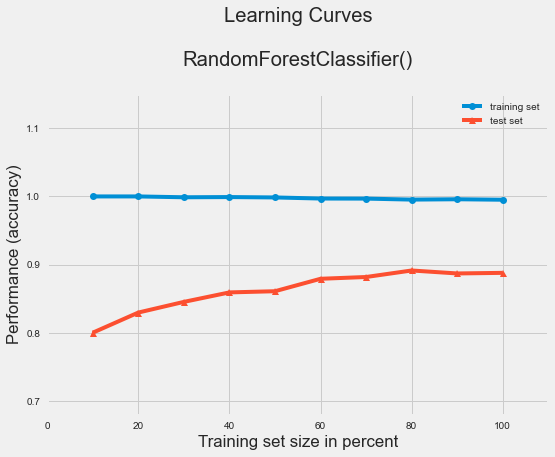

In [467]:
plot_learning_curves(X_train, y_train, X_test, y_test, rf, scoring='accuracy')
#plt.ylim(-.1,1.1)
plt.show()

In [794]:
#plot_learning_curves(X_train, y_train, X_test, y_test, rf, scoring='recall')
#plt.ylim(-.1,1.1)
#plt.show()

In [795]:
#plot_learning_curves(X_train, y_train, X_test, y_test, rf, scoring='roc_auc')
#plt.ylim(-.1,1.1)
#plt.show()

In [819]:
#print("recall_score %.2f" % recall_score(y_test, rf_pred_test))

recall_score 0.89


In [839]:
#print("precision_score %.2f" % precision_score(y_test, rf_pred_test))

In [237]:
#parameters = {
    "n_estimators":[5,10,50,100,250],
    "max_depth":[2,4,8,16,32,None]
    
}

In [376]:
#cv = GridSearchCV(rf,parameters,cv=5)
#cv.fit(X_train,y_train)

In [239]:
#def display(results):
    print(f'Best parameters are: {results.best_params_}')
    print("\n")
    mean_score = results.cv_results_['mean_test_score']
    std_score = results.cv_results_['std_test_score']
    params = results.cv_results_['params']
    for mean,std,params in zip(mean_score,std_score,params):
        print(f'{round(mean,3)} + or -{round(std,3)} for the {params}')

In [377]:
#display(cv)

In [79]:
#accuracy_score(y_test, rf_pred_test)

In [1081]:
#auc = roc_auc_score(y_test, rf_pred_test)
#print('AUC: %.2f' % auc)

In [1082]:
#fpr, tpr, thresholds = roc_curve(y_test, rf_pred_test)
#plot_roc_curve(fpr, tpr)

In [1083]:
#train_sizes, train_scores, validation_scores = learning_curve(
#estimator = RandomForestClassifier(),
#X = X_train,
#y = y_train, train_sizes = train_sizes, cv = 5,
#scoring = 'neg_mean_squared_error')

In [1084]:
#print('Training scores:\n\n', train_scores)
#print('\n', '-' * 70) # separator to make the output easy to read
#print('\nValidation scores:\n\n', validation_scores)

In [1085]:
#train_scores_mean_lm = -train_scores.mean(axis = 1)
#validation_scores_mean_lm = -validation_scores.mean(axis = 1)
#print('Mean training scores\n\n', pd.Series(train_scores_mean_lm, index = train_sizes))
#print('\n', '-' * 20) # separator
#print('\nMean validation scores\n\n',pd.Series(validation_scores_mean_lm, index = train_sizes))

In [1086]:
#plt.style.use('seaborn')
#plt.plot(train_sizes, train_scores_mean_lm, label = 'Training error')
#plt.plot(train_sizes, validation_scores_mean_lm, label = 'Validation error')
#plt.ylabel('Score', fontsize = 14)
#plt.xlabel('Training set size', fontsize = 14)
#plt.title('Learning curves for a linear regression model', fontsize = 18, y = 1.03)
#plt.legend()
#plt.ylim(0,5)

In [710]:
logit = LogisticRegression()
#random_state=44

In [711]:
logit.fit(X_train, y_train)

LogisticRegression()

In [712]:
logit_pred_train = logit.predict(X_train)
logit_pred_test = logit.predict(X_test)

In [713]:
#logit.score(X_test,y_test)
#logit.score(X_train, y_train)

In [714]:
#print('Train set')
#print('Logistic Regression roc-auc: {}'.format(roc_auc_score(y_train, logit_pred_train)))
#print('Test set')
#print('Logistic Regression roc-auc: {}'.format(roc_auc_score(y_test, logit_pred_test)))

In [715]:
print(confusion_matrix(y_test,logit_pred_test))
print(classification_report(y_test,logit_pred_test))

[[351 172]
 [181 449]]
              precision    recall  f1-score   support

          -1       0.66      0.67      0.67       523
           1       0.72      0.71      0.72       630

    accuracy                           0.69      1153
   macro avg       0.69      0.69      0.69      1153
weighted avg       0.69      0.69      0.69      1153



In [716]:
print("Accuracy Score %.2f" % accuracy_score(y_train, logit_pred_train))

Accuracy Score 0.67


In [717]:
print("Accuracy Score %.2f" % accuracy_score(y_test, logit_pred_test))

Accuracy Score 0.69


In [718]:
scores_logit = cross_val_score(logit, X_train, y_train, cv=5)
scores_logit

array([0.68215613, 0.64312268, 0.6598513 , 0.69516729, 0.67472119])

In [719]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores_logit.mean(), scores_logit.std()))

0.67 accuracy with a standard deviation of 0.02


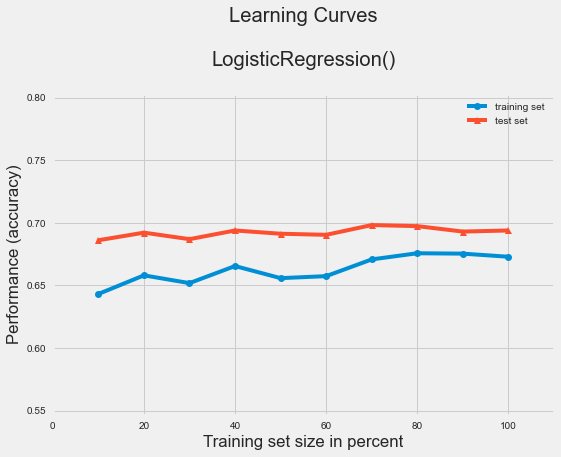

In [720]:
plot_learning_curves(X_train, y_train, X_test, y_test, logit, scoring='accuracy')
#plt.ylim(-.1,1.1)
plt.show()

In [797]:
#plot_learning_curves(X_train, y_train, X_test, y_test, logit, scoring='recall')
#plt.ylim(-.1,1.1)
#plt.show()

In [798]:
#plot_learning_curves(X_train, y_train, X_test, y_test, logit, scoring='roc_auc')
#plt.ylim(-.1,1.1)
#plt.show()

In [842]:
#print("recall_score %.2f" % recall_score(y_test, logit_pred_test))

In [841]:
#print("precision_score %.2f" % precision_score(y_test, logit_pred_test))
#precision_score

In [88]:
#accuracy_score(y_test, logit_pred_test)

In [241]:
#auc = roc_auc_score(y_test, logit_pred_test)
#print('AUC: %.2f' % auc)

In [242]:
#fpr, tpr, thresholds = roc_curve(y_test, logit_pred_test)
#plot_roc_curve(fpr, tpr)

In [765]:
SVM = SVC()
#C=995.59, gamma=9.78, 

In [766]:
SVM.fit(X_train,y_train)

SVC()

In [767]:
SVM_pred_train = SVM.predict(X_train)
SVM_pred_test = SVM.predict(X_test)

In [768]:
SVM.support_vectors_

array([[0.4658125 , 0.00184973, 0.09949296, ..., 0.00691124, 0.25606383,
        0.43534783],
       [0.445     , 0.9297556 , 0.98592958, ..., 0.01282249, 0.001     ,
        0.52221739],
       [0.51784375, 0.00269946, 0.97185915, ..., 0.001     , 0.001     ,
        0.37019565],
       ...,
       [0.49009375, 0.06303034, 1.        , ..., 0.001     , 0.001     ,
        0.78282609],
       [0.46928125, 0.01714488, 0.08542254, ..., 0.0837574 , 0.34108511,
        0.43534783],
       [0.5629375 , 0.00128324, 1.        , ..., 0.001     , 0.001     ,
        0.43534783]])

In [725]:
#SVM.score(X_test,y_test)
#SVM.score(X_train,y_train)

In [726]:
#SVM.support_

In [727]:
#SVM.n_support_

In [728]:
#print('Train set')
#print('SVM roc-auc: {}'.format(roc_auc_score(y_train, SVM_pred_train)))
#print('Test set')
#print('SVM roc-auc: {}'.format(roc_auc_score(y_test, SVM_pred_test)))

In [769]:
print(confusion_matrix(y_test,SVM_pred_test))
print(classification_report(y_test,SVM_pred_test))

[[450  73]
 [227 403]]
              precision    recall  f1-score   support

          -1       0.66      0.86      0.75       523
           1       0.85      0.64      0.73       630

    accuracy                           0.74      1153
   macro avg       0.76      0.75      0.74      1153
weighted avg       0.76      0.74      0.74      1153



In [770]:
print("Accuracy Score %.2f" % accuracy_score(y_train, SVM_pred_train))

Accuracy Score 0.74


In [771]:
print("Accuracy Score %.2f" % accuracy_score(y_test, SVM_pred_test))

Accuracy Score 0.74


In [772]:
scores_SVM = cross_val_score(SVM, X_train, y_train, cv=5)
scores_SVM

array([0.73420074, 0.73048327, 0.75464684, 0.74163569, 0.7267658 ])

In [773]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores_SVM.mean(), scores_SVM.std()))

0.74 accuracy with a standard deviation of 0.01


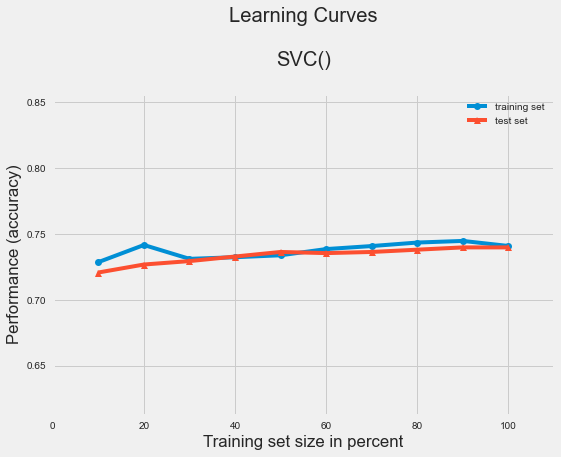

In [774]:
plot_learning_curves(X_train, y_train, X_test, y_test, SVM, scoring='accuracy')
#plt.ylim(-.1,1.1)
plt.show()

In [800]:
#plot_learning_curves(X_train, y_train, X_test, y_test, SVM, scoring='recall')
#plt.ylim(-.1,1.1)
#plt.show()

In [801]:
#plot_learning_curves(X_train, y_train, X_test, y_test, SVM, scoring='roc_auc')
#plt.ylim(-.1,1.1)
#plt.show()

In [843]:
#print("recall_score %.2f" % recall_score(y_test, SVM_pred_test))

In [844]:
#print("precision_score %.2f" % precision_score(y_test, SVM_pred_test))

In [867]:
#auc = roc_auc_score(y_test, SVM_pred_test)
#print('AUC: %.2f' % auc)

In [868]:
#fpr, tpr, thresholds = roc_curve(y_test, SVM_pred_test)
#plot_roc_curve(fpr, tpr)

In [518]:
#param_grid = {'C':[0.1,1,10,100,1000,10000], 'gamma':[100,10,1,0.1,0.01,0.001,0.0001]}

In [519]:
#grid_SVM = GridSearchCV(SVC(probability=True),param_grid,verbose=3)

In [685]:
#grid_SVM.fit(X_train,y_train)

In [686]:
#grid_SVM.best_params_

In [687]:
#SVM_grid=grid_SVM.best_estimator_
#SVM_grid

In [688]:
#grid_predictions_test = SVM_grid.predict(X_test)
#grid_predictions_train = SVM_grid.predict(X_train)

In [524]:
#print('Train set')
#print('SVM roc-auc: {}'.format(roc_auc_score(y_train, grid_predictions_train)))
#print('Test set')
#print('SVM roc-auc: {}'.format(roc_auc_score(y_test, grid_predictions_test)))

In [689]:
#print(confusion_matrix(y_test,grid_predictions_test))
#print(classification_report(y_test,grid_predictions_test))

In [690]:
#print("Accuracy Score %.3f" % accuracy_score(y_test, grid_predictions_test))

In [691]:
#plot_learning_curves(X_train, y_train, X_test, y_test, SVM_grid)
#plt.show()

In [1501]:
#grid.score(X_test,y_test)
#grid.score(X_train,y_train)

In [102]:
#accuracy_score(y_test, grid_predictions_test)

In [879]:
#auc = roc_auc_score(y_test, grid_predictions_test)
#print('AUC: %.2f' % auc)

In [880]:
#fpr, tpr, thresholds = roc_curve(y_test, grid_predictions_test)
#plot_roc_curve(fpr, tpr)

In [49]:
SVM_GA = SVC(C=995.59, gamma=9.78)
#C=995.59, gamma=9.78
#C=997, gamma=9.9

In [50]:
model = SVM_GA.fit(X_train,y_train)

In [51]:
SVM_GA_pred_train = SVM_GA.predict(X_train)
SVM_GA_pred_test = SVM_GA.predict(X_test)

In [52]:
print('Train set')
print('SVM_GA roc-auc: {}'.format(roc_auc_score(y_train, SVM_GA_pred_train)))
print('Test set')
print('SVM_GA roc-auc: {}'.format(roc_auc_score(y_test, SVM_GA_pred_test)))

Train set
SVM_GA roc-auc: 0.9131574975473549
Test set
SVM_GA roc-auc: 0.8682873531821906


In [53]:
print(confusion_matrix(y_test,SVM_GA_pred_test))
print(classification_report(y_test,SVM_GA_pred_test))

[[445  78]
 [ 72 558]]
              precision    recall  f1-score   support

          -1       0.86      0.85      0.86       523
           1       0.88      0.89      0.88       630

    accuracy                           0.87      1153
   macro avg       0.87      0.87      0.87      1153
weighted avg       0.87      0.87      0.87      1153



In [55]:
import shap

C:\Users\mha531\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\mha531\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\mha531\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\mha531\AppData\Local\C

In [64]:
B = SVM_GA.decision_function(X_train)

In [65]:
B

array([-0.99993248,  1.00016336,  2.85488142, ...,  2.64873626,
       -0.66546592, -1.07580443])

(array([   4.,    9.,   39.,  157., 1013., 1031.,  314.,   68.,   49.,
           6.]),
 array([-12.92380761, -10.43775799,  -7.95170836,  -5.46565873,
         -2.9796091 ,  -0.49355948,   1.99249015,   4.47853978,
          6.96458941,   9.45063903,  11.93668866]),
 <BarContainer object of 10 artists>)

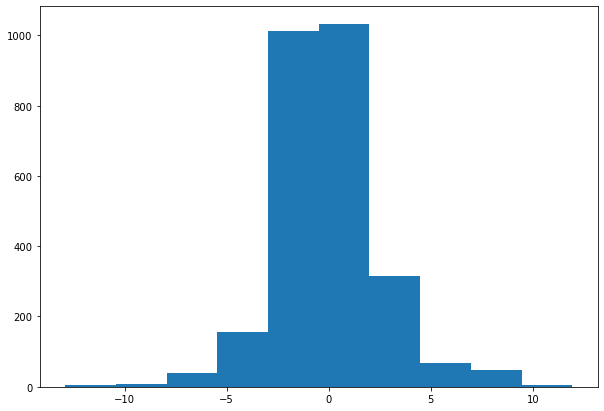

In [67]:
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(B)

In [68]:
T = SVM_GA.decision_function(X_test)

(array([  4.,  11.,  21.,  56., 296., 480., 225.,  33.,  19.,   8.]),
 array([-12.81110048, -10.43927005,  -8.06743961,  -5.69560918,
         -3.32377874,  -0.95194831,   1.41988213,   3.79171256,
          6.163543  ,   8.53537343,  10.90720387]),
 <BarContainer object of 10 artists>)

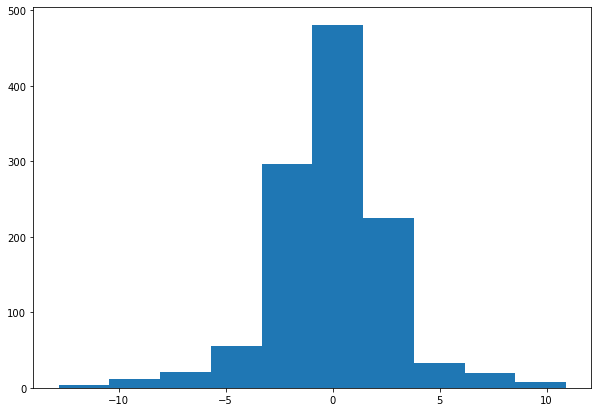

In [69]:
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(T)

In [60]:
#explainer = shap.Explainer(model)

In [57]:
#shap_values = explainer(X_train)

In [857]:
print("Accuracy Score %.2f" % accuracy_score(y_train, SVM_GA_pred_train))

Accuracy Score 0.91


In [858]:
print("Accuracy Score %.2f" % accuracy_score(y_test, SVM_GA_pred_test))

Accuracy Score 0.87


In [859]:
#auc = roc_auc_score(y_test, SVM_GA_pred_test)
#print('AUC: %.3f' % auc)

In [860]:
scores_SVM_GA = cross_val_score(SVM_GA, X_train, y_train, cv=5)
scores_SVM_GA

array([0.85130112, 0.84944238, 0.86802974, 0.81784387, 0.83643123])

In [861]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores_SVM_GA.mean(), scores_SVM_GA.std()))

0.84 accuracy with a standard deviation of 0.02


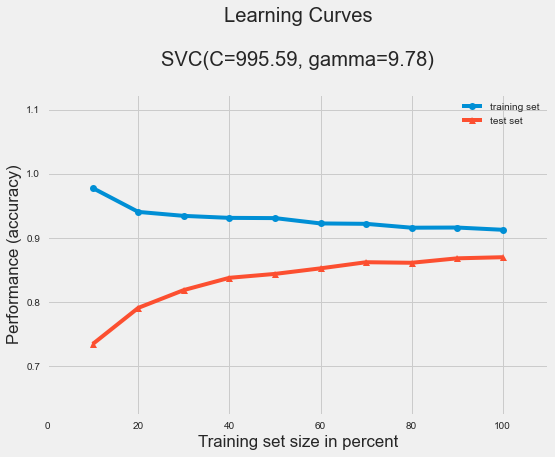

In [863]:
plot_learning_curves(X_train, y_train, X_test, y_test, SVM_GA,scoring='accuracy')
#plt.ylim(0.7,1)
#plt.xlim(0,20)
plt.show()

In [803]:
#plot_learning_curves(X_train, y_train, X_test, y_test, SVM_GA,scoring='recall')
#plt.ylim(-.1,1.1)
#plt.show()

In [804]:
#plot_learning_curves(X_train, y_train, X_test, y_test, SVM_GA,scoring='roc_auc')
#plt.ylim(-.1,1.1)
#plt.show()

In [805]:
#plot_learning_curves(X_train, y_train, X_test, y_test, SVM_GA,scoring='precision')
#plt.ylim(-.1,1.1)
#plt.show()

In [845]:
#print("recall_score %.2f" % recall_score(y_test, SVM_GA_pred_test))

In [846]:
#print("precision_score %.2f" % precision_score(y_test, SVM_GA_pred_test))

In [276]:
#train_sizes = [1, 100, 500, 1000, 1500,  2142]

In [275]:
#train_sizes, train_scores, validation_scores = learning_curve(
#SVM_GA,
#X = X_train,
#y = y_train, train_sizes = train_sizes, cv = 5,
#scoring = 'neg_mean_squared_error')

In [274]:
#print('Training scores:\n\n', train_scores)
#print('\n', '-' * 70) # separator to make the output easy to read
#print('\nValidation scores:\n\n', validation_scores)

In [273]:
#train_scores_mean_lm = -train_scores.mean(axis = 1)
#validation_scores_mean_lm = -validation_scores.mean(axis = 1)
#print('Mean training scores\n\n', pd.Series(train_scores_mean_lm, index = train_sizes))
#print('\n', '-' * 20) # separator
#print('\nMean validation scores\n\n',pd.Series(validation_scores_mean_lm, index = train_sizes))

In [272]:
#plt.style.use('seaborn')
#plt.plot(train_sizes, train_scores_mean_lm, label = 'Training error')
#plt.plot(train_sizes, validation_scores_mean_lm, label = 'Validation error')
#plt.ylabel('MSE', fontsize = 14)
#plt.xlabel('Training set size', fontsize = 14)
#plt.title('Learning curves (LR model)', fontsize = 18, y = 1.03)
#plt.legend()
#plt.ylim(0,2)

In [115]:
#NB = GaussianNB()

In [312]:
#NB.fit(X_train, y_train)

In [313]:
#y_pred= NB.predict(X_test) 

In [314]:
#print("Accuracy Score %.3f" % accuracy_score(y_test, y_pred))

In [315]:
#plot_learning_curves(X_train, y_train, X_test, y_test, NB)
#plt.show()

In [120]:
#model = LinearDiscriminantAnalysis(solver='svd')

In [121]:
#cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [122]:
#grid = dict()
#grid['solver'] = ['svd', 'lsqr', 'eigen']

In [123]:
#search = GridSearchCV(model, grid, scoring='accuracy', cv=cv, n_jobs=-1)

In [124]:
#results = search.fit(X_train, y_train)

In [316]:
#print('Mean Accuracy: %.3f' % results.best_score_)
#print('Config: %s' % results.best_params_)

In [317]:
#plot_learning_curves(X_train, y_train, X_test, y_test, search)
#plt.show()

In [408]:
#cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [409]:
#grid = dict()
#grid['shrinkage'] = arange(0, 1, 0.01)

In [410]:
#search = GridSearchCV(model, grid, scoring='accuracy', cv=cv, n_jobs=-1)

In [412]:
#results = search.fit(X_train, y_train)

In [413]:
#print('Mean Accuracy: %.3f' % results.best_score_)
#print('Config: %s' % results.best_params_)

In [633]:
# Instantiate the classfiers and make a list
classifiers = [
               
               
               SVM_GA,
              
               
               KNN,
               dt,
               NN,
               
               logit,
            
               
               
               ]

In [634]:
# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

In [635]:
# Train the models and record the results
for cls in classifiers:
    model = cls.fit(X_train, y_train)
    yproba = model.predict(X_test)
    
    fpr, tpr, _ = roc_curve(y_test,  yproba)
    auc = roc_auc_score(y_test, yproba)
    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

C:\Users\mha531\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [636]:

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

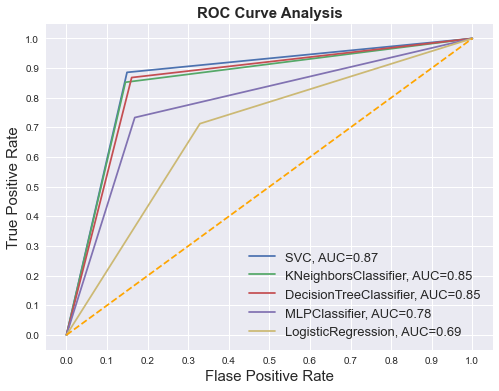

In [637]:
fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.2f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

In [146]:
#from __future__ import print_function

In [147]:
#from genetic_selection import GeneticSelectionCV

In [872]:
classifiers = [
               
               
              
               
               KNN,
               dt,
               NN,
               SVM,
               logit,
            
               
               ]

In [873]:
# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

In [874]:
# Train the models and record the results
#for cls in classifiers:
    #model = cls.fit(X_train, y_train)
    #yproba = model.predict_proba(X_test)[::,1]
    
    #fpr, tpr, _ = roc_curve(y_test,  yproba)
    #auc = roc_auc_score(y_test, yproba)
    
    #result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        #'fpr':fpr, 
                                        #'tpr':tpr, 
                                        #'auc':auc}, ignore_index=True)

In [875]:
# Train the models and record the results
for cls in classifiers:
    model = cls.fit(X_train, y_train)
    yproba = model.predict(X_test)
    
    fpr, tpr, _ = roc_curve(y_test,  yproba)
    auc = roc_auc_score(y_test, yproba)
    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

C:\Users\mha531\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [876]:
# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

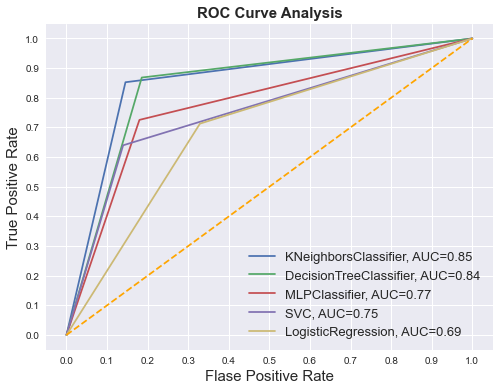

In [877]:
fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.2f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()